In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
hort_df = pd.read_csv("E:\My Python codes\Horticultural_Exports_2005-2014.csv", index_col = ["OBJECTID"])
hort_df

,_Commodity,Type,Kgs,Kshs,Date
OBJECTID,,,,,
0,Flowers,ALSTROMERIA,949410.06,192174616.5,01/01/2005 12:00:00 AM
1,Flowers,ARABICUM,164136.06,30285412.0,01/01/2005 12:00:00 AM
2,Flowers,"CARNATIONS, STD",2599236.25,707280768.0,01/01/2005 12:00:00 AM
3,Flowers,"CARNATIONS, SPRAY",936688.00,164790960.0,01/01/2005 12:00:00 AM
4,Flowers,CUTTINGS,469077.50,659962176.0,01/01/2005 12:00:00 AM
...,...,...,...,...,...
165,Vegetables,BEANS RUNNER,832454.53,290131830.0,01/01/2014 12:00:00 AM
166,Vegetables,PEAS SNAP,1109364.46,332928224.0,01/01/2014 12:00:00 AM
167,Vegetables,PEAS SNOW,3045919.16,980570928.0,01/01/2014 12:00:00 AM


In [3]:
hort_df.rename(columns = {"_Commodity":"Commodity"}, inplace = True)

In [4]:
hort_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Commodity  170 non-null    object 
 1   Type       170 non-null    object 
 2   Kgs        170 non-null    float64
 3   Kshs       170 non-null    float64
 4   Date       170 non-null    object 
dtypes: float64(2), object(3)
memory usage: 8.0+ KB


In [5]:
hort_df['Type'].unique()

array(['ALSTROMERIA', 'ARABICUM', 'CARNATIONS, STD', 'CARNATIONS, SPRAY',
       'CUTTINGS', 'ROSES', 'MIXED FLOWERS', 'AVOCADO', 'PASSION FRUIT',
       'MANGO', 'BEANS FINE', 'BEANS X-FINE', 'BEANS RUNNER', 'PEAS SNAP',
       'PEAS SNOW', 'DUDHI', 'OKRA'], dtype=object)

In [6]:
hort_df.describe()

,Kgs,Kshs
count,1.700000e+02,1.700000e+02
mean,8.143009e+06,2.652703e+09
std,1.797833e+07,6.743005e+09
min,0.000000e+00,0.000000e+00
25%,5.989391e+05,1.388786e+08
50%,1.616177e+06,6.595743e+08
75%,5.676979e+06,1.547970e+09
max,9.814500e+07,4.212156e+10


I would like to remove the instances where commodities were not sold (Values at 0 for those years)

In [7]:
hort_df1 = hort_df.loc[~((hort_df['Kgs']==0) | (hort_df['Kshs']== 0))]
hort_df1

,Commodity,Type,Kgs,Kshs,Date
OBJECTID,,,,,
0,Flowers,ALSTROMERIA,949410.06,192174616.5,01/01/2005 12:00:00 AM
1,Flowers,ARABICUM,164136.06,30285412.0,01/01/2005 12:00:00 AM
2,Flowers,"CARNATIONS, STD",2599236.25,707280768.0,01/01/2005 12:00:00 AM
3,Flowers,"CARNATIONS, SPRAY",936688.00,164790960.0,01/01/2005 12:00:00 AM
4,Flowers,CUTTINGS,469077.50,659962176.0,01/01/2005 12:00:00 AM
...,...,...,...,...,...
165,Vegetables,BEANS RUNNER,832454.53,290131830.0,01/01/2014 12:00:00 AM
166,Vegetables,PEAS SNAP,1109364.46,332928224.0,01/01/2014 12:00:00 AM
167,Vegetables,PEAS SNOW,3045919.16,980570928.0,01/01/2014 12:00:00 AM


In [8]:
hort_df1.describe()

,Kgs,Kshs
count,1.620000e+02,1.620000e+02
mean,8.545133e+06,2.772960e+09
std,1.832548e+07,6.884891e+09
min,3.122750e+04,5.779869e+06
25%,6.949345e+05,1.859548e+08
50%,1.787292e+06,7.037433e+08
75%,6.435605e+06,1.587161e+09
max,9.814500e+07,4.212156e+10


In [9]:
hort_df1.Date

OBJECTID
0      01/01/2005 12:00:00 AM
1      01/01/2005 12:00:00 AM
2      01/01/2005 12:00:00 AM
3      01/01/2005 12:00:00 AM
4      01/01/2005 12:00:00 AM
                ...          
165    01/01/2014 12:00:00 AM
166    01/01/2014 12:00:00 AM
167    01/01/2014 12:00:00 AM
168    01/01/2014 12:00:00 AM
169    01/01/2014 12:00:00 AM
Name: Date, Length: 162, dtype: object

In [10]:
import datetime as dt

In [11]:
hort_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 169
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Commodity  162 non-null    object 
 1   Type       162 non-null    object 
 2   Kgs        162 non-null    float64
 3   Kshs       162 non-null    float64
 4   Date       162 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.6+ KB


In [13]:
#I'm just changing the date format from string to datetime and have it in years since all exports are done on the first day of each year
hort_df1.loc[:,'Date'] = pd.to_datetime(hort_df1.loc[:,'Date'], format= '%d/%m/%Y %H:%M:%S %p').dt.year

hort_df1

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Commodity,Type,Kgs,Kshs,Date
OBJECTID,,,,,
0,Flowers,ALSTROMERIA,949410.06,192174616.5,2005
1,Flowers,ARABICUM,164136.06,30285412.0,2005
2,Flowers,"CARNATIONS, STD",2599236.25,707280768.0,2005
3,Flowers,"CARNATIONS, SPRAY",936688.00,164790960.0,2005
4,Flowers,CUTTINGS,469077.50,659962176.0,2005
...,...,...,...,...,...
165,Vegetables,BEANS RUNNER,832454.53,290131830.0,2014
166,Vegetables,PEAS SNAP,1109364.46,332928224.0,2014
167,Vegetables,PEAS SNOW,3045919.16,980570928.0,2014


Insights to draw from data
1. What is the highest selling commodity and type of commodity in Price and/or quantity
3. Visualise a trend in the export of commodities over the years
4. Determine percentage contribution of horticultural exports to GDP over the years

# 1. Determine the highest selling commodity and type of commodity in Price

In [14]:
hort_commodity = hort_df1.groupby(['Commodity']).sum().drop('Date', axis=1)
hort_commodity.sort_values("Kshs", ascending = False, inplace = True)
hort_commodity

,Kgs,Kshs
Commodity,,
Flowers,8.447852e+08,3.498192e+11
Vegetables,3.145842e+08,7.558170e+10
Fruits,2.249422e+08,2.381862e+10


In [15]:
hort_commodity.style.background_gradient(cmap='Wistia',axis=1).format("{:.2f}").format("{:.0f}",subset=["Kgs","Kshs"])

,Kgs,Kshs
Commodity,,
Flowers,844785159,349819201810
Vegetables,314584185,75581702240
Fruits,224942240,23818624581


Text(0.5, 1.0, "Export by Commodity in '00 Bns")

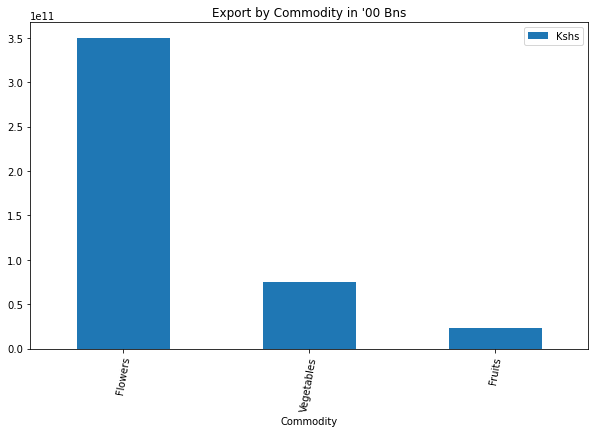

In [16]:
hort_commodity.plot(y = "Kshs", kind='bar', figsize = (10, 6), rot=80)
plt.title("Export by Commodity in '00 Bns")

Flowers are the highest selling commodity by quantity and price

In [17]:
flowers = hort_df1[hort_df1["Commodity"] == "Flowers"].groupby('Type').sum().sort_values("Kshs", ascending = False).drop('Date', axis=1)
flowers.describe()

,Kgs,Kshs
count,7.000000e+00,7.000000e+00
mean,1.206836e+08,4.997417e+10
std,2.759307e+08,9.638833e+10
min,2.508605e+06,5.901503e+08
25%,6.029808e+06,1.839996e+09
50%,1.240370e+07,1.002841e+10
75%,3.623183e+07,3.506438e+10
max,7.453496e+08,2.653919e+11


Text(0.5, 1.0, "Export by Type of Flower in '00Bns")

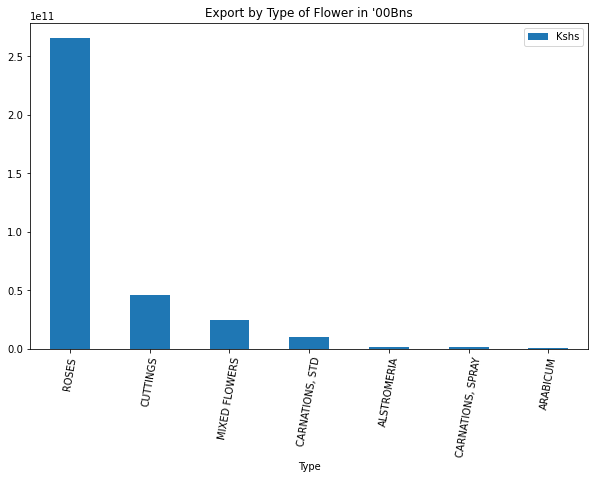

In [19]:
flowers.plot(y = "Kshs", kind='bar', figsize = (10, 6), rot=80)
plt.title("Export by Type of Flower in '00Bns")

Roses are the highest selling flowers at more than 250 B Kshs

In [20]:
veg = hort_df1[hort_df1["Commodity"] == "Vegetables"].groupby('Type').sum().sort_values("Kshs", ascending = False).drop('Date', axis=1)
veg

,Kgs,Kshs
Type,,
BEANS FINE,1.782444e+08,4.421233e+10
BEANS X-FINE,5.058636e+07,9.579833e+09
PEAS SNOW,2.614664e+07,8.721774e+09
BEANS RUNNER,3.566530e+07,6.605674e+09
PEAS SNAP,1.886635e+07,5.393239e+09
OKRA,4.415142e+06,9.066091e+08
DUDHI,6.599723e+05,1.622434e+08


Text(0.5, 1.0, "Export by Type of Vegetable in '0Bns")

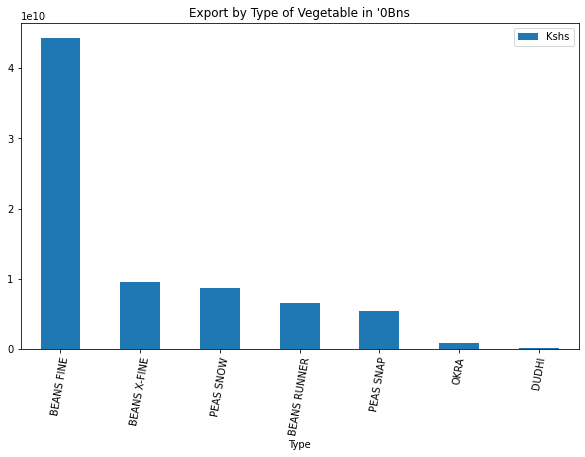

In [21]:
veg.plot(y = "Kshs", kind='bar', figsize = (10, 6), rot=80)
plt.title("Export by Type of Vegetable in '0Bns")

Beans fine are the highest selling vegetables at 40 Bn Kshs

In [22]:
fruits = hort_df1[hort_df1["Commodity"] == "Fruits"].groupby('Type').sum().sort_values("Kshs", ascending = False).drop('Date', axis=1)
fruits

,Kgs,Kshs
Type,,
AVOCADO,1.839928e+08,1.465022e+10
MANGO,3.174773e+07,4.602497e+09
PASSION FRUIT,9.201683e+06,4.565904e+09


Text(0.5, 1.0, "Export by Type of Fruit in '0Bns")

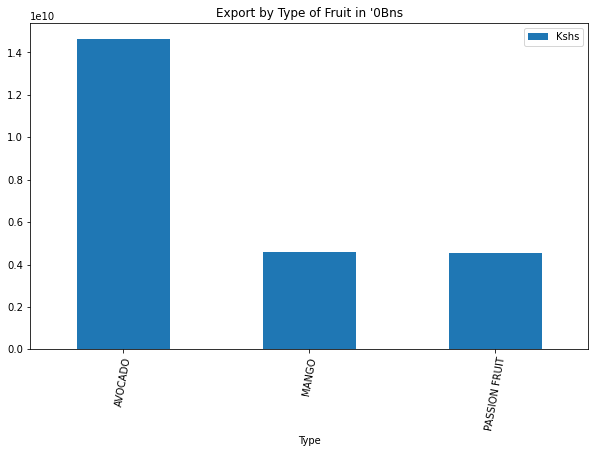

In [23]:
fruits.plot(y = "Kshs", kind='bar', figsize = (10, 6), rot=80)
plt.title("Export by Type of Fruit in '0Bns")

Avocados are the highest selling fruit in the market at 14bn Kshs

# 2. Visualise a trend in the export of commodities over the years

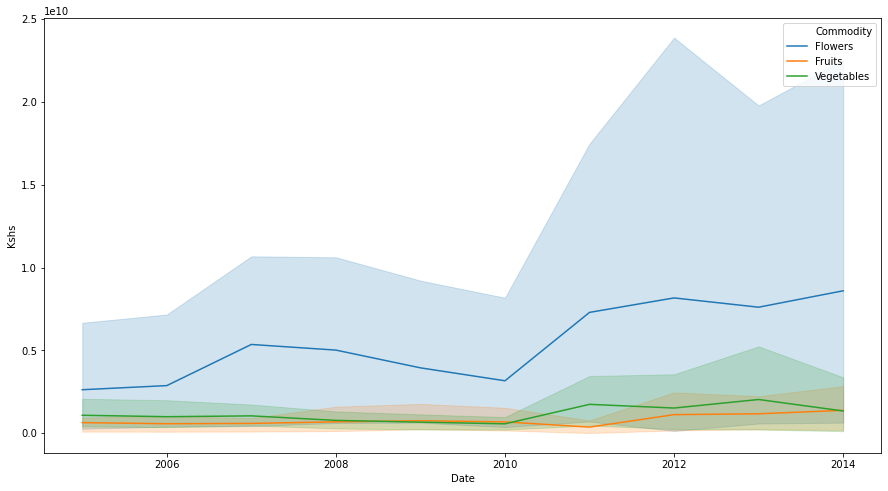

In [24]:

plt.figure(figsize=(15,8))
sns.lineplot(x='Date', y='Kshs', data=hort_df1, hue='Commodity')

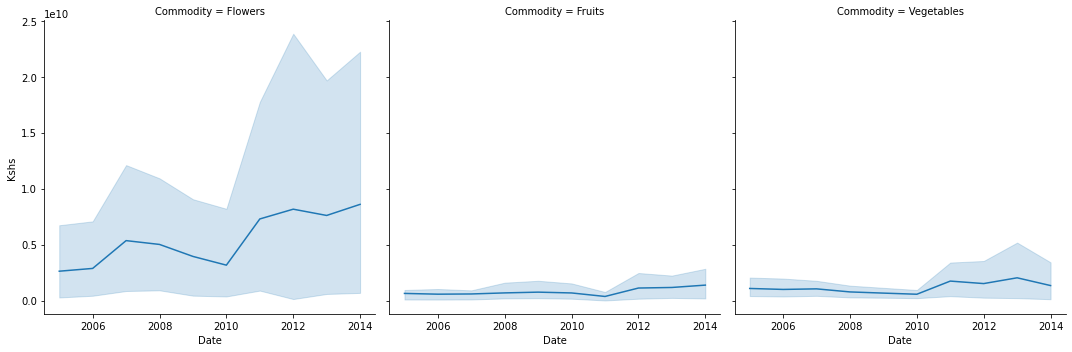

In [25]:
g = sns.relplot(x="Date", y="Kshs", col="Commodity", data=hort_df1, kind='line')


There is a general upward increase in all three commidities. However, vegetables have shown, a decline in 2014.

# 3. Determine percentage contribution of horticultural exports to GDP over the years

In [156]:
gdp = pd.read_csv("E:\My Python codes\GDP Data.csv", index_col='Country Name')
gdp.filter(like='Ken', axis=0)
gdp


,Country Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,
Aruba,ABW,2.330726e+09,2.424581e+09,2.615084e+09,2.745251e+09,2.498883e+09,2.390503e+09,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN
Afghanistan,AFG,6.209138e+09,6.971286e+09,9.747880e+09,1.010923e+10,1.243909e+10,1.585657e+10,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.936264e+10,2.019176e+10,1.948438e+10,1.910135e+10
Angola,AGO,3.697092e+10,5.238101e+10,6.526645e+10,8.853861e+10,7.030716e+10,8.379950e+10,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,9.463542e+10
Albania,ALB,8.052076e+09,8.896074e+09,1.067732e+10,1.288135e+10,1.204422e+10,1.192693e+10,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527808e+10
Andorra,AND,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,3.663102e+09,3.846820e+09,4.655899e+09,5.687418e+09,5.653793e+09,5.835874e+09,6.701698e+09,6.499807e+09,7.074778e+09,7.396705e+09,6.442916e+09,6.719172e+09,7.245707e+09,7.942962e+09,7.926108e+09
"Yemen, Rep.",YEM,1.674634e+10,1.906198e+10,2.165053e+10,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540134e+10,4.041524e+10,4.320647e+10,3.697620e+10,2.808468e+10,2.456133e+10,2.759126e+10,NaN
South Africa,ZAF,2.577730e+11,2.716380e+11,2.994160e+11,2.867700e+11,2.959360e+11,3.753490e+11,4.164190e+11,3.963330e+11,3.668290e+11,3.509050e+11,3.176210e+11,2.963570e+11,3.495540e+11,3.682890e+11,3.514320e+11


In [157]:
#Good practice says I have to address null values but I really only want the Kenyan row.
#As long as that doesn't have null values, we're good. So let's confirm
gdp.filter(like='Ken', axis=0)

,Country Code,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,
Kenya,KEN,1.873790e+10,2.582552e+10,3.195820e+10,3.589515e+10,3.702151e+10,4.000009e+10,4.195343e+10,5.041275e+10,5.509673e+10,6.144805e+10,6.400775e+10,6.918876e+10,7.896500e+10,8.777858e+10,9.550309e+10


In [27]:
for idx,column in enumerate(gdp.columns):
    print(idx,column)
#So its easier to see how the columns are indexed

0 Country Name
1 Country Code
2 2005
3 2006
4 2007
5 2008
6 2009
7 2010
8 2011
9 2012
10 2013
11 2014
12 2015
13 2016
14 2017
15 2018
16 2019


In [158]:
#to collect the years from 2005 to 2014 and to convert to Kshs
gdp_k = gdp.iloc[119,2:12].apply(lambda x : x * 100)
gdp_k1 = pd.DataFrame(gdp_k).reset_index().rename(columns = {"index":"Date","Kenya":"Gdp"})
gdp_k1


,Date,Gdp
0,2006,2.582552e+12
1,2007,3.195820e+12
2,2008,3.589515e+12
3,2009,3.702151e+12
4,2010,4.000009e+12
5,2011,4.195343e+12
6,2012,5.041275e+12
7,2013,5.509673e+12
8,2014,6.144805e+12
9,2015,6.400775e+12


In [159]:
#changing the date column from string to datetime format
gdp_k1['Date'] = pd.to_datetime(gdp_k1['Date'], format= '%Y').dt.year
gdp_k1

,Date,Gdp
0,2006,2.582552e+12
1,2007,3.195820e+12
2,2008,3.589515e+12
3,2009,3.702151e+12
4,2010,4.000009e+12
5,2011,4.195343e+12
6,2012,5.041275e+12
7,2013,5.509673e+12
8,2014,6.144805e+12
9,2015,6.400775e+12


In [135]:
hort_gdp = hort_df1.groupby(['Date']).sum()
hort_gdp.reset_index(inplace = True)
hort_gdp

,Date,Kgs,Kshs
0,2005,1.206403e+08,2.782529e+10
1,2006,1.185103e+08,2.876162e+10
2,2007,1.329408e+08,4.655728e+10
3,2008,1.343588e+08,4.254419e+10
4,2009,1.289492e+08,3.450504e+10
5,2010,1.075312e+08,2.811907e+10
6,2011,1.594241e+08,6.256693e+10
7,2012,1.494711e+08,5.327605e+10
8,2013,1.631790e+08,6.132372e+10
9,2014,1.693066e+08,6.374034e+10


In [160]:
#Making a new dataframe by combinig the gdp column from gdp_k1 with the rest from hort_gdp
gdp1 = gdp_k1['Gdp']
hort_gdp1 = hort_gdp.join(gdp1)
hort_gdp1

,Date,Kgs,Kshs,Gdp
0,2005,1.206403e+08,2.782529e+10,2.582552e+12
1,2006,1.185103e+08,2.876162e+10,3.195820e+12
2,2007,1.329408e+08,4.655728e+10,3.589515e+12
3,2008,1.343588e+08,4.254419e+10,3.702151e+12
4,2009,1.289492e+08,3.450504e+10,4.000009e+12
5,2010,1.075312e+08,2.811907e+10,4.195343e+12
6,2011,1.594241e+08,6.256693e+10,5.041275e+12
7,2012,1.494711e+08,5.327605e+10,5.509673e+12
8,2013,1.631790e+08,6.132372e+10,6.144805e+12
9,2014,1.693066e+08,6.374034e+10,6.400775e+12


In [161]:
hort_gdp1['%contribution'] = 100*(hort_gdp1['Kshs']/hort_gdp1['Gdp'])
hort_gdp1

,Date,Kgs,Kshs,Gdp,%contribution
0,2005,1.206403e+08,2.782529e+10,2.582552e+12,1.077434
1,2006,1.185103e+08,2.876162e+10,3.195820e+12,0.899976
2,2007,1.329408e+08,4.655728e+10,3.589515e+12,1.297035
3,2008,1.343588e+08,4.254419e+10,3.702151e+12,1.149175
4,2009,1.289492e+08,3.450504e+10,4.000009e+12,0.862624
5,2010,1.075312e+08,2.811907e+10,4.195343e+12,0.670245
6,2011,1.594241e+08,6.256693e+10,5.041275e+12,1.241093
7,2012,1.494711e+08,5.327605e+10,5.509673e+12,0.966955
8,2013,1.631790e+08,6.132372e+10,6.144805e+12,0.997977
9,2014,1.693066e+08,6.374034e+10,6.400775e+12,0.995822


In [162]:
hort_gdp1.describe()

,Date,Kgs,Kshs,Gdp,%contribution
count,10.00000,1.000000e+01,1.000000e+01,1.000000e+01,10.000000
mean,2009.50000,1.384312e+08,4.492195e+10,4.436192e+12,1.015834
std,3.02765,2.090489e+07,1.474568e+10,1.281313e+12,0.185839
min,2005.00000,1.075312e+08,2.782529e+10,2.582552e+12,0.670245
25%,2007.25000,1.227175e+08,3.019747e+10,3.617674e+12,0.916721
50%,2009.50000,1.336498e+08,4.455074e+10,4.097676e+12,0.996899
75%,2011.75000,1.569359e+08,5.931180e+10,5.392573e+12,1.131240
max,2014.00000,1.693066e+08,6.374034e+10,6.400775e+12,1.297035


Horticultural industry contributes to about 1% of country's GDP

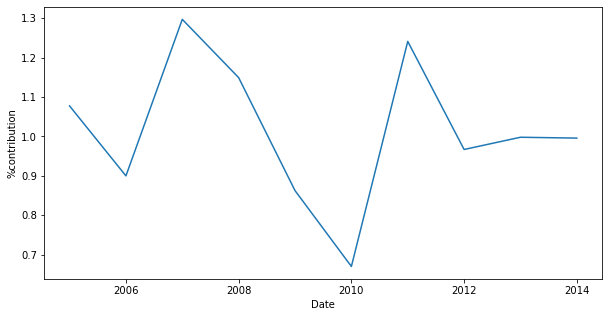

In [163]:
#Lets show this on a simple line graph
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='%contribution', data=hort_gdp1)